In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading'

# 10% and 50% thresholds on three datasets
This script contains plots for three datasets - `200217_geminin`, `200207_new data`,`191202_new dataset`. We have used two different thresholds: 10% and 50% volume thresholds for these datasets. 

## table of contents
* [Comparing two thresholds](#comparison)
* [10%](#10threshold)
    * [200217_geminin](#20021710)
    * [200203_new data](#20020710)
    * [191202_new dataset](#19120210)
* [50%](#50threshold)
    * [200217_geminin](#20021750)
    * [200203_new data](#20020750)
    * [191202_new dataset](#19120250)

# Comparing 10% and 50% thresholds <a name="comparison"></a>

In [12]:
file=f'{bigDir}\\20200217_geminin\\200217_cellinfo_v11_10.csv'
data1=pd.read_csv(file)
data1=data1.loc[data1.group=='CTL',:]
file=f'{bigDir}\\20200203_new data\\cellinfo_200203_v12_10.csv'
data2=pd.read_csv(file)
data2=data2.loc[data2.group=='siLuc',:]
file=f'{bigDir}\\20191202_new dataset\\signals_new_v8_10.csv'
data3=pd.read_csv(file)
frames=[data1,data2,data3]
data=pd.concat(frames)

C:\ProgramData\Anaconda3_reinstalled\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [13]:
data.head()

,DAPI ch,DIC ch,Unnamed: 0,Unnamed: 0.1.1.1.1.1,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,category,cell id for tracking,...,outer_vol_het,outer_vol_total,p_age,path,physical age [min],physical_age,physical_age [min],temp,x,y
0,3.0,NaN,0,NaN,MCM3,1.0,HP1,2.0,lateG1,NaN,...,10225.0,284197.0,NaN,Z:\CookLab\Liu\20190816_organizedData_MCM_load...,NaN,8.833333,470min,NaN,1312.741,235.893
1,3.0,NaN,1,NaN,MCM3,1.0,HP1,2.0,middleG1,NaN,...,5091.0,167866.0,NaN,Z:\CookLab\Liu\20190816_organizedData_MCM_load...,NaN,5.666667,280min,NaN,1323.444,397.761
2,3.0,NaN,2,NaN,MCM3,1.0,HP1,2.0,G2,NaN,...,6963.0,331281.0,NaN,Z:\CookLab\Liu\20190816_organizedData_MCM_load...,NaN,NaN,NaN,NaN,1772.297,584.995
3,3.0,NaN,3,NaN,MCM3,1.0,HP1,2.0,lateG1,NaN,...,3882.0,237928.0,NaN,Z:\CookLab\Liu\20190816_organizedData_MCM_load...,NaN,7.833333,410min,NaN,163.044,727.256
4,3.0,NaN,4,NaN,MCM3,1.0,HP1,2.0,middleG1,NaN,...,8915.0,246376.0,NaN,Z:\CookLab\Liu\20190816_organizedData_MCM_load...,NaN,5.666667,280min,NaN,1791.955,755.367


In [14]:
data=data.loc[(data['ab2 (heterochromatin)']=='HP1beta') | (data['ab2 (heterochromatin)'] == 'HP1'), :]

In [15]:
data.day.unique()

array(['d20200217', 'd20200203', 'd20191203'], dtype=object)

<IPython.core.display.Javascript object>


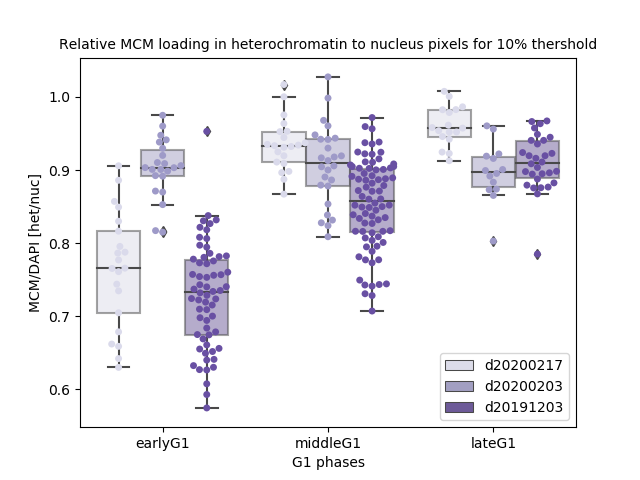

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels for 10% thershold')

In [16]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
ax=sns.boxplot(x='category',y='temp',data=data,hue='day',boxprops=dict(alpha=.5), palette='Purples',order=['earlyG1','middleG1','lateG1'])
sns.swarmplot(x='category',y='temp',data=data,hue='day',dodge=True, palette='Purples',order=['earlyG1','middleG1','lateG1'])


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3])
plt.ylabel('MCM/DAPI [het/nuc]')
plt.xlabel('G1 phases')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels for 10% thershold',fontsize=10)

In [17]:
file=f'{bigDir}\\20200217_geminin\\200217_cellinfo_v11_50.csv'
data1=pd.read_csv(file)
data1=data1.loc[data1.group=='CTL',:]
file=f'{bigDir}\\20200203_new data\\cellinfo_200203_v12_50.csv'
data2=pd.read_csv(file)
data2=data2.loc[data2.group=='siLuc',:]
file=f'{bigDir}\\20191202_new dataset\\signals_new_v8_50.csv'
data3=pd.read_csv(file)
frames=[data1,data2,data3]
data=pd.concat(frames)

C:\ProgramData\Anaconda3_reinstalled\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


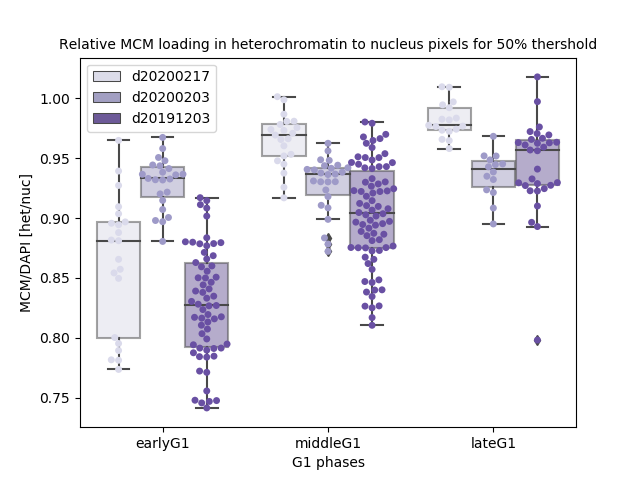

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels for 50% thershold')

In [18]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
ax=sns.boxplot(x='category',y='temp',data=data,hue='day',boxprops=dict(alpha=.5), palette='Purples',order=['earlyG1','middleG1','lateG1'])
sns.swarmplot(x='category',y='temp',data=data,hue='day',dodge=True, palette='Purples',order=['earlyG1','middleG1','lateG1'])


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3])
plt.ylabel('MCM/DAPI [het/nuc]')
plt.xlabel('G1 phases')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels for 50% thershold',fontsize=10)

# 10% threshold <a name="10threshold"></a>
## 20200217_geminin <a name="20021710"></a>
#### load datasets

In [5]:
# loading datasets
## 200217 geminin dataset
file=f'{bigDir}\\20200217_geminin\\200217_cellinfo_v11_10.csv'
data=pd.read_csv(file)

In [7]:
data=data.loc[data.group=='CTL',:]

In [8]:
data.head()

,Unnamed: 0,file,original cell name,movie,x,y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,...,mol_age_mod,nuc_hp1b_total,inner_hp1b_total,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu
0,0,20200217_cell_00.ciz,2020024-19-21-63X.czi,20200217pinducer gemininxy19,1312.741,235.893,MCM3,1,HP1,2,...,0.948,2.693842e+09,9.314778e+08,1.762364e+09,1.339535e+09,8.299883e+08,509546448.0,1.354307e+09,101489496.0,1.252817e+09
1,1,20200217_cell_01.ciz,2020024-19-27-63X.czi,20200217pinducer gemininxy19,1323.444,397.761,MCM3,1,HP1,2,...,0.465,2.172380e+09,8.241901e+08,1.348189e+09,9.915096e+08,6.602304e+08,331279227.0,1.180870e+09,163959707.0,1.016910e+09
2,2,20200217_cell_02.ciz,2020024-19-39-63X.czi,20200217pinducer gemininxy19,1772.297,584.995,MCM3,1,HP1,2,...,2.001,3.263571e+09,1.319735e+09,1.943836e+09,1.458153e+09,1.100649e+09,357504422.0,1.805418e+09,219086613.0,1.586331e+09
3,3,20200217_cell_03.ciz,2020024-19-49-63X.czi,20200217pinducer gemininxy19,163.044,727.256,MCM3,1,HP1,2,...,1.063,2.334174e+09,9.963424e+08,1.337832e+09,1.103680e+09,8.515261e+08,252154253.0,1.230494e+09,144816240.0,1.085678e+09
4,4,20200217_cell_04.ciz,2020024-19-51-63X.czi,20200217pinducer gemininxy19,1791.955,755.367,MCM3,1,HP1,2,...,0.579,2.112534e+09,6.756199e+08,1.436915e+09,9.837290e+08,5.828320e+08,400897040.0,1.128805e+09,92787952.0,1.036018e+09


## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


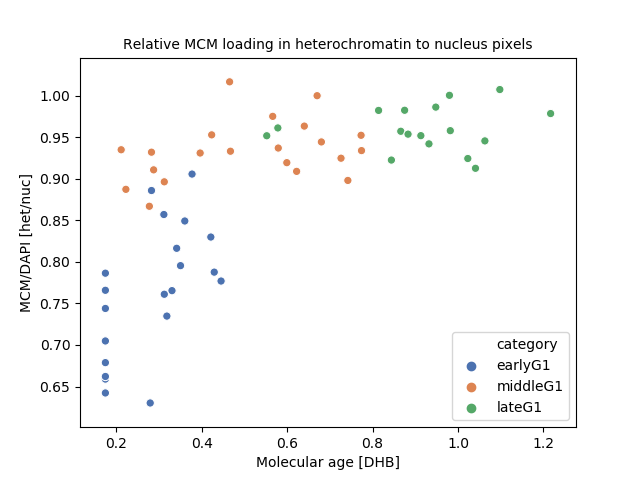

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [10]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


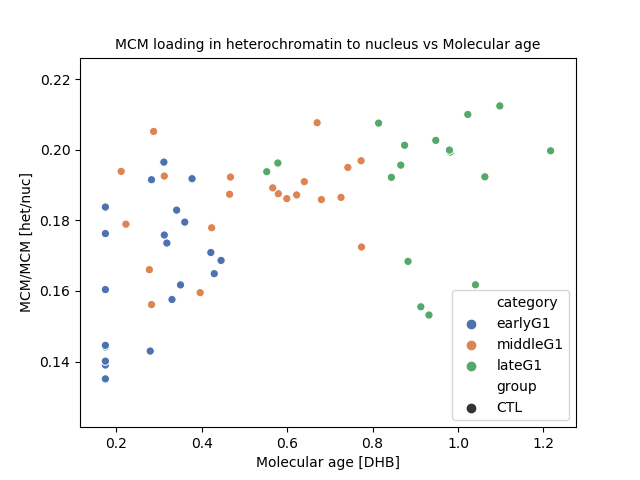

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [11]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep', style='group')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

## 200203 new data <a name="20020310"></a>
## question/note
    should I be separating siLUC and siMCM3 group??
#### load data

In [18]:
## 200207 new data
file=f'{bigDir}\\20200203_new data\\cellinfo_200203_v12_10.csv'
data=pd.read_csv(file)
data=data.loc[data.group=='siMCM3']

In [19]:
data.head()

,Unnamed: 0,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,...,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu,day,physical_age,mol_age_mod,temp
74,74,20200203_cell_74.ciz,20200203-12-6-63X 16bit,20200203 simcmxy12,879.153,60.437,MCM3,1.0,HP1beta,2.0,...,804712693.0,520591964.0,284120729.0,7.577610e+08,108134466.0,649626560.0,d20200203,2.500000,0.406,0.816542
75,75,20200203_cell_75.ciz,20200203-12-7-63X 16bit,20200203 simcmxy12,182.010,73.883,MCM3,1.0,HP1beta,2.0,...,559165647.0,347813630.0,211352017.0,6.559716e+08,81269495.0,574702086.0,d20200203,1.833333,0.166,0.834054
76,76,20200203_cell_76.ciz,20200203-12-16-63X 16bit,20200203 simcmxy12,1506.808,196.672,MCM3,1.0,HP1beta,2.0,...,672322831.0,429800168.0,242522663.0,7.945123e+08,125055934.0,669456376.0,d20200203,3.333333,0.353,0.820740
77,77,20200203_cell_77.ciz,20200203-12-17-63X 16bit,20200203 simcmxy12,951.625,224.825,MCM3,1.0,HP1beta,2.0,...,998976798.0,630490320.0,368486478.0,9.810696e+08,121927949.0,859141627.0,d20200203,2.500000,0.459,0.795357
78,78,20200203_cell_78.ciz,20200203-12-33-63X 16bit,20200203 simcmxy12,1114.567,433.223,MCM3,1.0,HP1beta,2.0,...,867757205.0,446947057.0,420810148.0,1.052780e+09,96253390.0,956526425.0,d20200203,3.333333,0.474,0.830869


## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


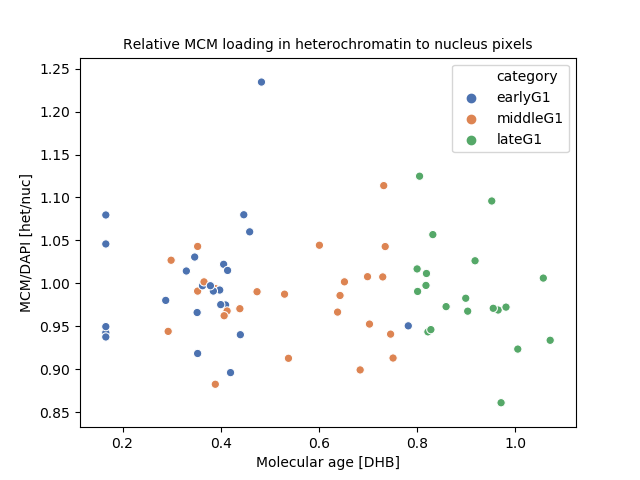

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [28]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


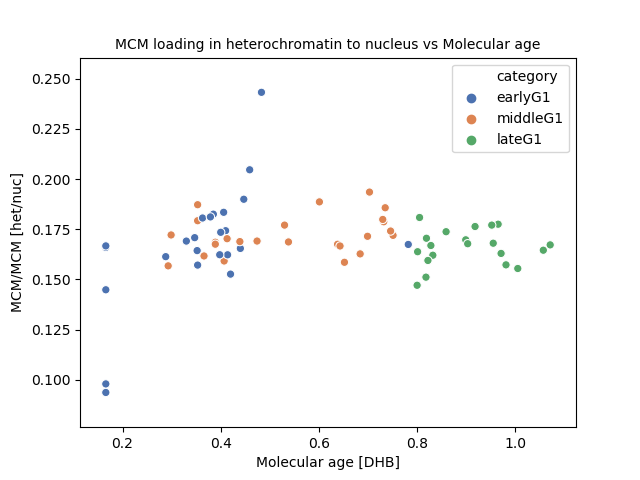

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [29]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

## 191202 new data <a name="19120210"></a>

#### load data

In [30]:
## 200207 new data
file=f'{bigDir}\\20191202_new dataset\\signals_new_v8_10.csv'
data=pd.read_csv(file)

In [31]:
data.head()

,Unnamed: 0,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,...,mol_age_mod,nuc_hp1b_total,inner_hp1b_total,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu
0,0,20191203_cell-00.czi,20191125-01-17,191125pcnat_dhbr_cdc6vxy01,678.301,200.931,MCM3,1,HP1beta,2,...,0.444,1.415176e+09,425500564.0,9.896759e+08,550518042.0,321679433.0,228838609.0,8.646584e+08,103821131.0,7.608373e+08
1,1,20191203_cell-01.czi,20191125-01-20,191125pcnat_dhbr_cdc6vxy01,1552.152,240.479,MCM3,1,HP1beta,2,...,1.373,2.175016e+09,804184935.0,1.370831e+09,896267478.0,567124747.0,329142731.0,1.278748e+09,237060188.0,1.041688e+09
2,2,20191203_cell-02.czi,20191125-01-23,191125pcnat_dhbr_cdc6vxy01,1131.436,318.530,MCM3,1,HP1beta,2,...,1.371,1.933001e+09,666820604.0,1.266180e+09,732487366.0,444813519.0,287673847.0,1.200514e+09,222007085.0,9.785064e+08
3,3,20191203_cell-03.czi,20191125-01-25,191125pcnat_dhbr_cdc6vxy01,1650.585,324.968,MCM3,1,HP1beta,2,...,0.208,1.062142e+09,233589820.0,8.285525e+08,403943621.0,187675893.0,216267728.0,6.581987e+08,45913927.0,6.122848e+08
4,4,20191203_cell-04.czi,20191125-01-32,191125pcnat_dhbr_cdc6vxy01,1466.687,426.815,MCM3,1,HP1beta,2,...,0.345,1.717888e+09,546330833.0,1.171557e+09,697150763.0,424718652.0,272432111.0,1.020738e+09,121612181.0,8.991254e+08


## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


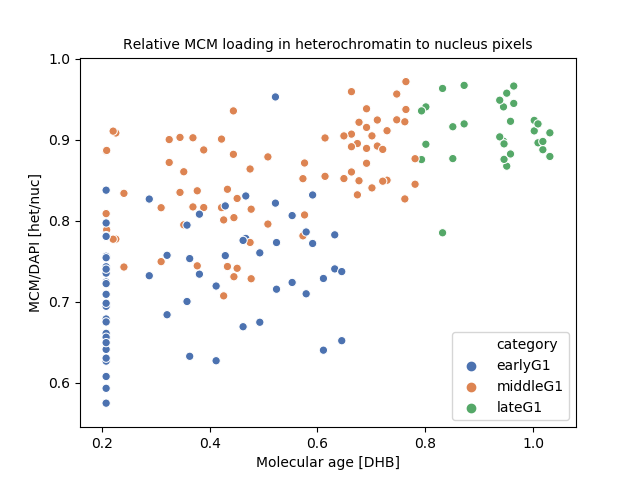

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [32]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


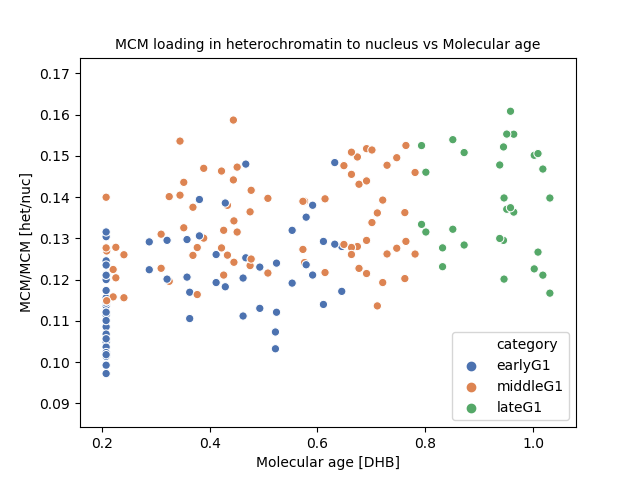

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [33]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

# 50% thershold <a name="50threshold"></a>
## 20200217_geminin <a name="20021750"></a>
#### load dataset

In [13]:
file=f'{bigDir}\\20200217_geminin\\200217_cellinfo_v11_50.csv'
data=pd.read_csv(file)
data=data.loc[data.group=='CTL',:]

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


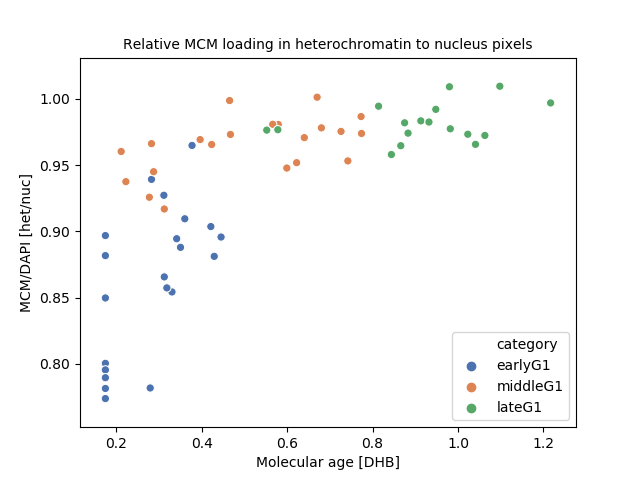

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [15]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


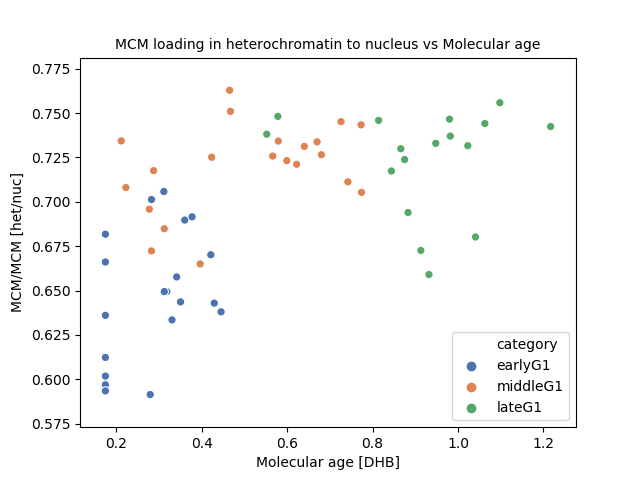

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [16]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

## 20200203_new data <a name="20020350"></a>
#### load dataset

In [34]:
file=f'{bigDir}\\20200203_new data\\cellinfo_200203_v12_50.csv'
data=pd.read_csv(file)

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


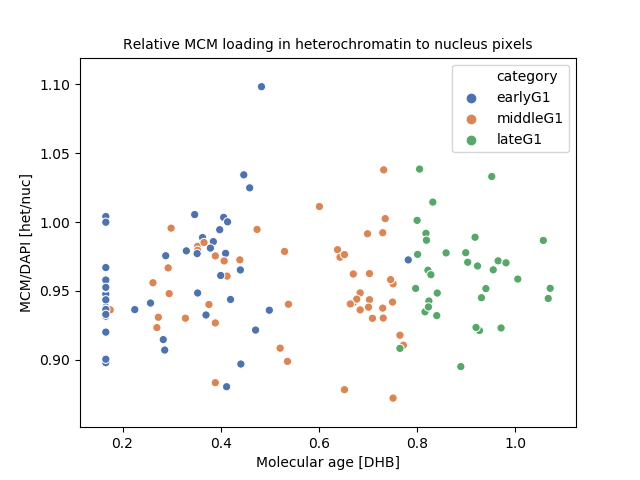

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [35]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


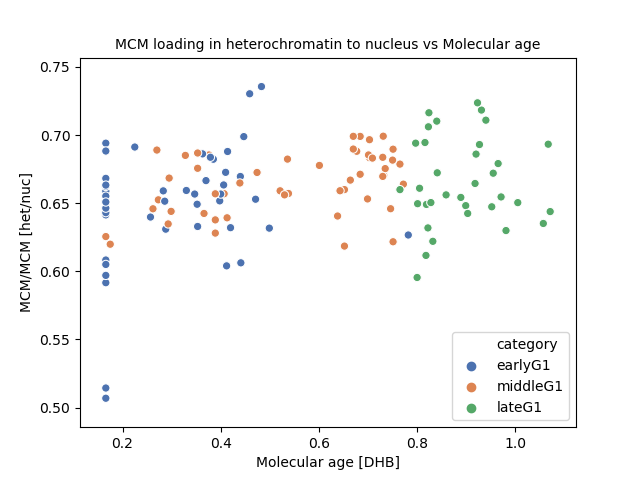

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [36]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

## 20191202_new dataset <a name="19120250"></a>
#### load dataset

In [37]:
file=f'{bigDir}\\20191202_new dataset\\signals_new_v8_50.csv'
data=pd.read_csv(file)

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


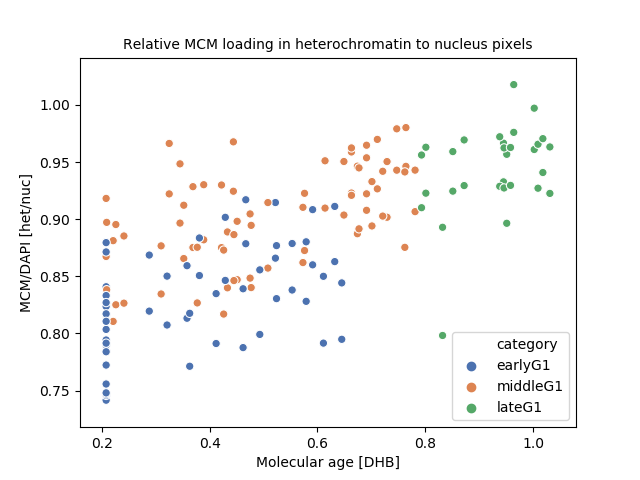

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [38]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


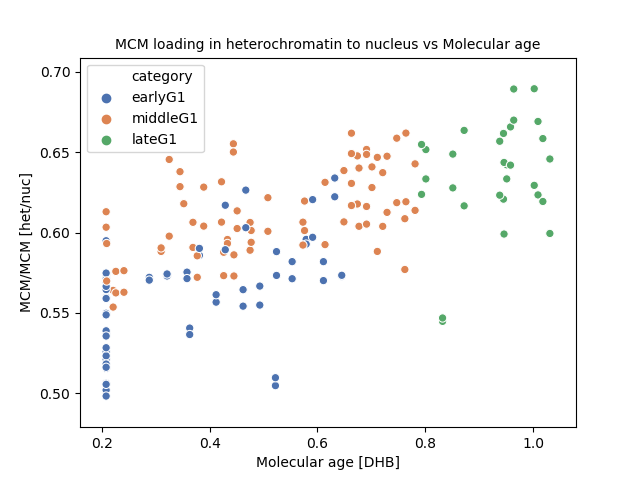

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [40]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)